<a href="https://colab.research.google.com/github/jayakhan/document-classification/blob/main/lstm_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Import Libraries

In [ ]:
import numpy as np
import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 2) Set Model Hyperparameters

In [28]:
#Hyperparameters
vocab_size = 2000
embedding_dim = 64
max_length = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

## 3) Load Real Dataset

In [31]:
# Adding Dataset into articles and labels list
articles = []
labels = []
with open('/content/synthetic_data_v1.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [32]:
# Clean Label Names
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

## 4) Split data into 70% training and 30% validation datasets

In [33]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [34]:
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

2100
2100
900
900


In [35]:
# Check distribution of training dataset
pd.Series(train_labels).value_counts()

scispace                123
recmotorcycles          120
compwindowsx            120
recsporthockey          118
compsysmachardware      115
scielectronics          106
scimed                  105
compsysibmpchardware    104
scicrypt                103
talkpoliticsmideast     102
recsportbaseball        101
compgraphics            101
talkpoliticsmisc        101
talkreligionmisc        101
altatheism              101
talkpoliticsguns        100
composmswindowsmisc      99
miscforsale              97
recautos                 95
socreligionchristian     88
dtype: int64

In [36]:
 # Check distribution of validation dataset
 pd.Series(validation_labels).value_counts()

scispace                53
recmotorcycles          52
compwindowsx            51
recsporthockey          50
compsysmachardware      49
scimed                  45
scielectronics          45
scicrypt                44
talkpoliticsmideast     44
compsysibmpchardware    44
recsportbaseball        44
compgraphics            44
talkpoliticsguns        43
talkreligionmisc        43
altatheism              43
talkpoliticsmisc        43
miscforsale             42
composmswindowsmisc     42
recautos                41
socreligionchristian    38
dtype: int64

## 5a) Tokenization and Vectorization - Articles

In [37]:
# Tokenize articles for training datasets
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
train_sequences = tokenizer.texts_to_sequences(train_articles)
validation_sequences = tokenizer.texts_to_sequences(validation_articles)

print(train_sequences[10])
print(validation_sequences[10])

[1214, 56, 889, 987, 1110, 68, 682, 341, 227, 532, 799, 916, 608, 144, 56, 97, 317, 549, 1418, 65, 603, 22, 12, 484, 183, 515, 109, 118, 290, 141, 645, 96, 69, 237, 41, 62, 184, 507, 1782, 40, 47, 109, 385, 287, 17, 88, 411, 927, 46, 411, 1455, 737, 528, 1380, 212, 1486, 881, 168, 14, 1842, 234, 263, 128, 405, 905, 1748, 1227, 505, 268, 248, 212, 130, 341, 15, 202, 1754, 497, 9, 52, 3, 293, 263, 365, 1783, 512, 2, 299, 737, 709, 14, 1669, 600, 11, 111, 211, 88, 930, 45, 889, 16, 7, 1399, 157, 472, 1504, 1432, 3, 18, 47, 24, 676, 168, 53, 233, 341, 1045, 101, 562, 930, 86, 170, 72, 79, 497, 1413, 146, 168, 14, 120, 168, 378, 954, 189, 42, 22, 236, 1026, 94, 62, 476, 15, 2, 2, 97, 676, 47, 647, 6, 89, 1933, 23, 5, 1026, 328, 14, 104, 151, 397, 446, 170, 83, 527, 22, 365, 263, 1204, 22, 222, 490, 1556, 777, 1626, 1057, 344, 1084, 2, 557, 1381, 109, 205, 960, 386, 287, 499, 210, 299, 1381, 109, 458, 1311, 22, 3, 946, 430, 6, 905, 261, 42, 22, 3, 303, 1128, 2, 12, 31, 22, 214, 10, 537, 1153

In [38]:
# Padding to the end of the training and validation articles
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

print(len(validation_sequences[10]))
print(len(validation_padded[10]))

497
500
500
500
499
500
499
500


## 5b) Tokenization and Vectorization - Labels

In [39]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels_new)
training_label_seq = np.asarray(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.asarray(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[6]
[11]
(2100, 1)
[2]
[9]
[12]
(900, 1)


## 6) Model Building

In [40]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 2000, and output embedding dimension of size 64
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          128000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
Total params: 204,384
Trainable params: 204,384
Non-trainable params: 0
_________________________________________________________________


In [41]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, None) <dtype: 'float32'>
(None, 32) <dtype: 'float32'>
embedding_1 (None, None) float32
bidirectional_1 (None, None, 64) float32
dense_2 (None, 128) float32
dense_3 (None, 64) float32


[None, None, None, None]

In [42]:
# Check dataset before model fitting
print(train_padded.shape)
print(training_label_seq.shape)
print(validation_padded.shape)
print(validation_label_seq.shape)

(2100, 500)
(2100, 1)
(900, 500)
(900, 1)


In [43]:
# Check dataset before model fitting
print(type(train_padded))
print(type(training_label_seq))
print(type(validation_padded))
print(type(validation_label_seq))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 6) Model Validation

In [45]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
66/66 - 19s - loss: 0.3345 - accuracy: 0.8943 - val_loss: 0.6198 - val_accuracy: 0.7856 - 19s/epoch - 291ms/step
Epoch 2/10
66/66 - 14s - loss: 0.1944 - accuracy: 0.9471 - val_loss: 0.4530 - val_accuracy: 0.8478 - 14s/epoch - 214ms/step
Epoch 3/10
66/66 - 14s - loss: 0.1372 - accuracy: 0.9576 - val_loss: 0.5396 - val_accuracy: 0.8222 - 14s/epoch - 213ms/step
Epoch 4/10
66/66 - 14s - loss: 0.1510 - accuracy: 0.9595 - val_loss: 0.4588 - val_accuracy: 0.8500 - 14s/epoch - 213ms/step
Epoch 5/10
66/66 - 14s - loss: 0.0803 - accuracy: 0.9833 - val_loss: 0.4353 - val_accuracy: 0.8611 - 14s/epoch - 213ms/step
Epoch 6/10
66/66 - 14s - loss: 0.1064 - accuracy: 0.9686 - val_loss: 0.3947 - val_accuracy: 0.8767 - 14s/epoch - 213ms/step
Epoch 7/10
66/66 - 14s - loss: 0.0403 - accuracy: 0.9900 - val_loss: 0.2758 - val_accuracy: 0.9178 - 14s/epoch - 214ms/step
Epoch 8/10
66/66 - 14s - loss: 0.0747 - accuracy: 0.9795 - val_loss: 0.4432 - val_accuracy: 0.8544 - 14s/epoch - 214ms/step
Epoch 9/

## 7) Model Evaluation

In [46]:
score = model.evaluate(validation_padded, validation_label_seq, verbose=10)

print("Loss: %.3f \nAccuracy: %.3f" % (score[0], score[1]))

Loss: 0.440 
Accuracy: 0.870


In [47]:
from sklearn.metrics import classification_report

y_pred = model.predict(validation_padded, batch_size=64, verbose=10)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(validation_label_seq.copy(), y_pred_bool.copy()))

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        53
           2       0.90      0.87      0.88        52
           3       1.00      1.00      1.00        51
           4       0.96      0.96      0.96        50
           5       0.91      0.80      0.85        49
           6       0.76      0.93      0.84        45
           7       0.94      0.67      0.78        45
           8       0.81      0.95      0.88        44
           9       0.97      0.89      0.93        44
          10       0.87      0.93      0.90        44
          11       0.87      0.89      0.88        44
          12       1.00      0.98      0.99        44
          13       0.96      0.58      0.72        43
          14       0.80      0.81      0.80        43
          15       0.94      0.72      0.82        43
          16       0.86      1.00      0.92        43
          17       0.87      0.93      0.90        42
          18       0.87    

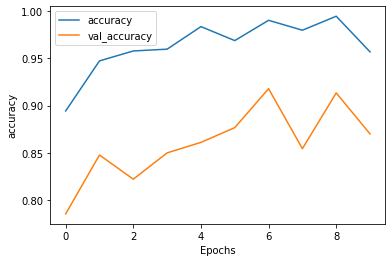

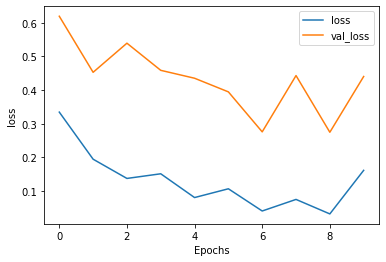

In [48]:
# Plot graphs for accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")